In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Downloads\SN_TEST.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

   time    Area
0     5  0.4924
1     7  0.7988
2    10  1.5420
3    15  2.7320
4    20  3.5900
5    25  4.2670
6    30  4.6720
7    40  5.3720
8    50  5.6860
9    60  6.1920


In [29]:
df = pd.DataFrame(df)
df.columns = [col.strip() for col in df.columns]
print(df.columns)
print(df)

Index(['time', 'Area'], dtype='object')
    time    Area
0    5.0  0.4924
1    7.0  0.7988
2   10.0  1.5420
3   15.0  2.7320
4   20.0  3.5900
5   25.0  4.2670
6   30.0  4.6720
7   40.0  5.3570
8   50.0  5.6860
9   60.0  6.0020
10  70.0  6.1920


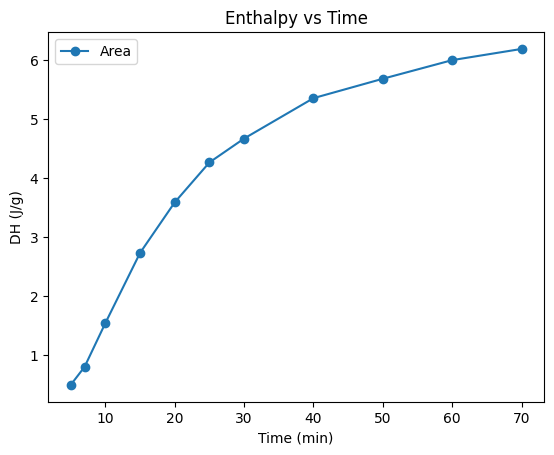

In [30]:
df.plot(x='time', y='Area', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

In [31]:
t_data = np.array(df['time'])
a_data = np.array(df['Area'])

In [32]:
# Define the DH function
def DH(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))
# ou need to provide an initial guess for the parameters (DHinf, k, tzero, and n). This is necessary for the curve fitting algorithm to start the optimization process. You might base your initial guess on some knowledge of the system or by visually inspecting the data.
initial_guess = (6.19, 0.05, 1, 1)

In [33]:
# Fit the function 
from scipy.optimize import curve_fit

#scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
params, covariance = curve_fit(DH, t_data, a_data, p0=initial_guess)

# Fitted parameters estraction 
DHinf_fit, k_fit, tzero_fit, n_fit = params

Fitted DHinf: 6.241487855992436
Fitted k: 0.03719719126995143
Fitted tzero: 3.3615543620862147
Fitted n: 1.1064417970039309


In [ ]:
print("Fitted DHinf:", DHinf_fit)
print("Fitted k:", k_fit)
print("Fitted tzero:", tzero_fit)
print("Fitted n:", n_fit)

In [34]:
print(covariance)

[[ 1.37170466e-02  7.52818437e-04  3.87196400e-02 -7.56744010e-03]
 [ 7.52818437e-04  9.39998516e-05  5.34478447e-03 -8.12211801e-04]
 [ 3.87196400e-02  5.34478447e-03  3.53245623e-01 -4.46959683e-02]
 [-7.56744010e-03 -8.12211801e-04 -4.46959683e-02  7.21618801e-03]]


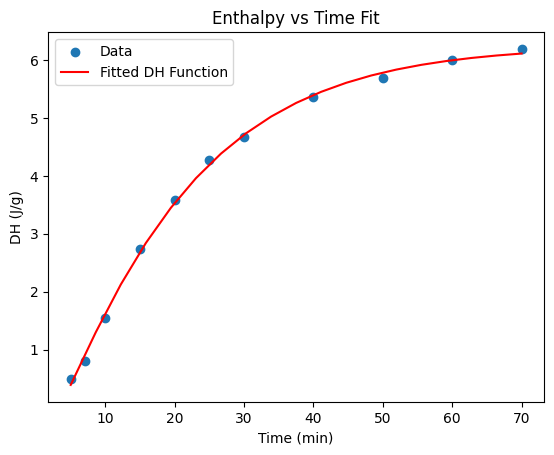

In [35]:
def fitted_DH(t_data):
    return DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

# Plot the original data and the fitted function
plt.scatter(t_data, a_data, label='Data')
t_values = np.linspace(min(t_data), max(t_data), 19)
plt.plot(t_values, fitted_DH(t_values), label='Fitted DH Function', color='red')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time Fit')
plt.legend()
plt.show()

In [36]:
x = np.abs(t_data - tzero_fit)
y = np.log(1 - a_data / DHinf_fit)

print(x)
print(y)

[ 1.63844564  3.63844564  6.63844564 11.63844564 16.63844564 21.63844564
 26.63844564 36.63844564 46.63844564 56.63844564 66.63844564]
[-0.08217738 -0.13694556 -0.28376506 -0.57574848 -0.85609765 -1.15090954
 -1.38046923 -1.95396509 -2.41912712 -3.26047116 -4.83724657]


LINEAR MODEL

In [38]:
def LogDHn(y, k_lin, n_lin):
    return -k_lin * np.abs(x**n_lin)

In [40]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
print(coef)

[-0.0657299   0.22317293]


Text(0.5, 1.0, 'Linear fit')

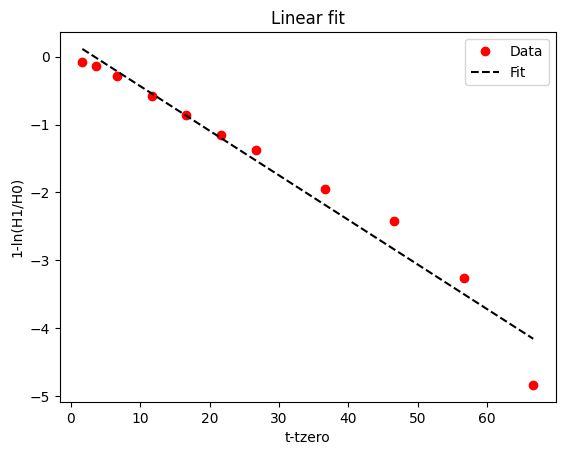

In [41]:
plt.plot(x,y, 'ro', label='Data')
plt.plot(x, poly1d_fn(x), '--k', label='Fit')
plt.legend()
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')